# sandbox (tf 2.0+)

`PYTHONPATH` should include a path to several libraries, including:  
`neurite`, `voxelmorph`, `neurite-sandbox`, `voxelmorph-sandbox`, `pytools-lib`


In [1]:
# some jupyter stuff
%config Completer.use_jedi = False
%matplotlib inline  

In [2]:
# imports
import pathlib, sys
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# imports of some personal libraries

# neurite (available on pip) for visualization
import neurite as ne

# gppvae_vis -- the path to the git repo clone should be in PYTHONPATH
# if not, add via sys.path.append('/path/to/gppvae_vis_repo')
sys.path.append('/path/to/gppvae_vis')
import gppvae_vis as gv

# Data

we do some search for the files in a path.  
you can also just set `atlas_file` and `corr_file` and skip this cell  

In [4]:
# path to where 'atlas.nii' and a bunch of 'norm*' files are.
data_dir = '/path/to/data/'

# let's see what's in that folder:
data_path = pathlib.Path(data_dir)
files = [f for f in data_path.iterdir() if str(f.name).startswith('norm')]
[print(f) for f in files];

# select the atlas and correlation files. Note you could just do this manually and not list the folder.
atlas_file = data_path/'atlas.nii'
corr_file = files[4]

/space/bhim/2/users/adalca/projects/gppvae/data/norm_corr_gene_5_3_rs9874409.nii.gz
/space/bhim/2/users/adalca/projects/gppvae/data/norm_corr_gene_6_15_rs9888681.nii.gz
/space/bhim/2/users/adalca/projects/gppvae/data/norm_corr_gene_4_2_rs7299798.nii.gz
/space/bhim/2/users/adalca/projects/gppvae/data/norm_corr_gene_1_4_rs13135092.nii.gz
/space/bhim/2/users/adalca/projects/gppvae/data/norm_corr_gene_3_19_rs429358.nii.gz
/space/bhim/2/users/adalca/projects/gppvae/data/norm_corr_gene_2_8_rs13266032.nii.gz


In [5]:
# select the atlas and correlation files. Note you could just do this manually and not list the folder.
atlas_file = data_path/'atlas.nii'
corr_file = files[4]

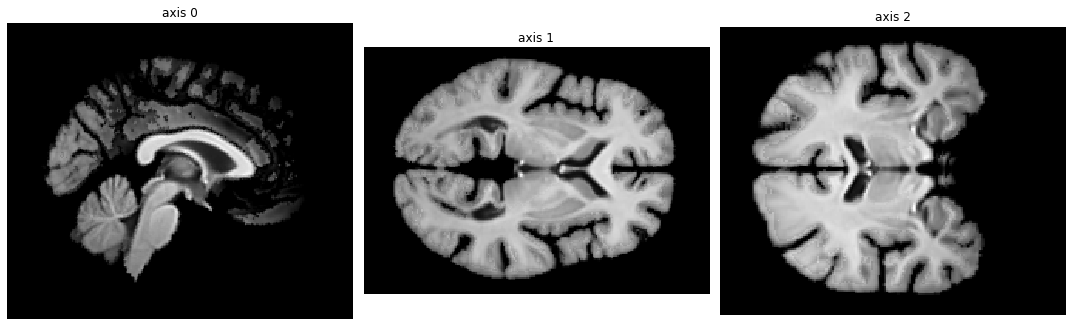

In [6]:
# let's look at the atlas
atlas = nib.load(atlas_file).get_fdata()
ne.plot.volume3D(atlas, cmaps=['gray'])

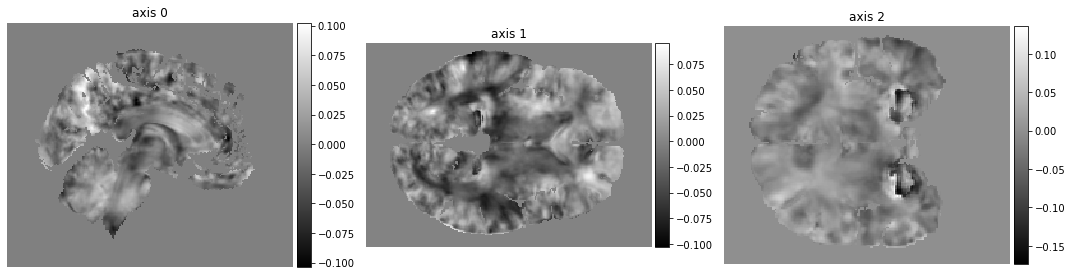

In [7]:
# let's look at the correlation
corr = nib.load(files[-2]).get_fdata().astype('float32')
ne.plot.volume3D(corr, cmaps=['gray'], do_colorbars=True)

# let's visualize with gppvae_vis

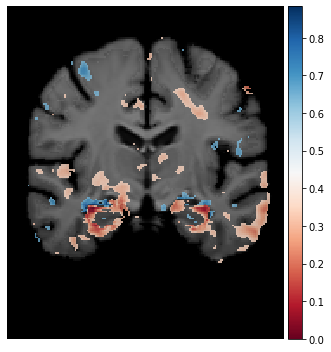

In [8]:
# let's visualize a slice id
slice_id = 112

overlay_im = gv.utils.overlay_image_heatmaps(atlas[..., slice_id],
                                             corr[..., slice_id],
                                             perc=[0.2, 0.8],
                                             min_show=-0.05,
                                             max_show=0.05)

# visualize
ne.plot.slices(np.rot90(overlay_im, -1), width=5, cmaps=['RdBu'], do_colorbars=True);

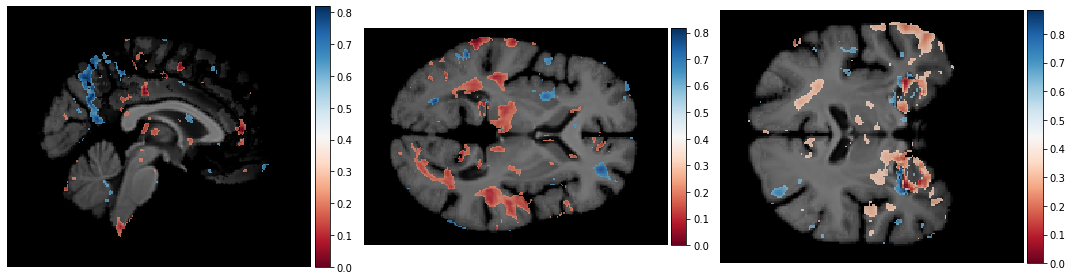

In [9]:
# let's visualize all slices, middle
slice_ids = [f//2 for f in atlas.shape]
overlay_im = [gv.utils.overlay_image_heatmaps(np.take(atlas, slice_ids[d], d),
                                              np.take(corr, slice_ids[d], d),
                                              perc=[0.2, 0.8],
                                              min_show=-0.05,
                                              max_show=0.05) for d in range(3)]

# visualize
ne.plot.slices(overlay_im, cmaps=['RdBu'], do_colorbars=True);

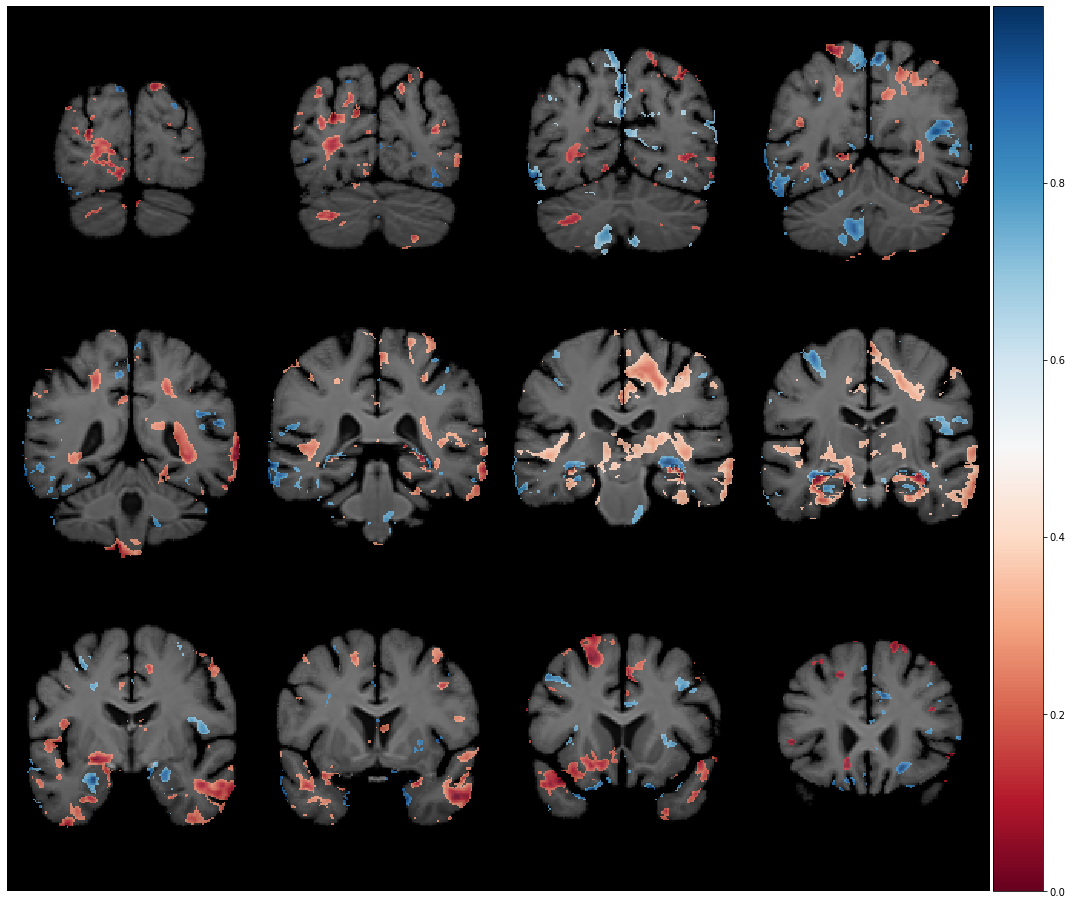

In [10]:
slice_range = range(40, 160, 10)
atlas_slices = [np.rot90(atlas[..., f], -1) for f in slice_range]
corr_slices = [np.rot90(corr[..., f], -1) for f in slice_range]

# compute mosaic
mosaic = gv.utils.overlay_image_heatmaps_grid(atlas_slices, 
                                              corr_slices,
                                              grid=True,
                                              perc=[0.4, 0.8],
                                              min_show=-0.05, max_show=0.05)

# visualize
ne.plot.slices(mosaic, cmaps=['RdBu'], do_colorbars=True);